Seja a base de dados [Gapminder](https://www.gapminder.org/data/). Tomando-se uma série amostral qualquer (buscar por “Choose individual indicators”), deve-se:

a) Caracterizar a amostra, inclusive graficamente; [1,5]

b) Com base no modelo Gaussiano e em um segundo (à escolha), verificar sua aderência
à série de dados, usando o teste de Kolmogorov-Smirnov. Deve-se implementar o
teste, sendo desejável validar a implementação com base em rotina disponível numa
ferramenta de análise matemática ou linguagem de programação qualquer. 

## Item a)

### Leitura e filtragem dos dados

Os dados escolhidos da base de dados [Gapminder](https://www.gapminder.org/data/) foram os de expectativas de vida.

Optou-se por trabalhar com os dados somente do Brasil, no período de 1970 à 2019. Sendo assim, antes de calcular os parâmetros e gerar os gráficos para caracterização da amostra, é necessário filtrar os dados obtidos.

Neste item, utilizou-se a linguagem de programação [Python](https://www.python.org/) e para efetuar a leitura e filtragem dos dados utilizou-se a famosa biblioteca [Pandas](https://pandas.pydata.org/).

A leitura dos dados do arquivo `lex.csv` é feita pelo trecho do código abaixo.

In [258]:
# | code-fold: false
import pandas as pd

df = pd.read_csv("lex.csv")
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


Como foi dito acima, trabalharemos com os dados somente do Brasil, no período de 1970 a 2019. No trecho de código abaixo são apresentadas as instruções para as filtragens necessárias e também manipulações com as estruturas de dados da biblioteca `pandas` para facilitar os trabalhos posteriores. Após o trecho de código, uma tabela com os dados filtrados é apresentada.

In [259]:
# | code-fold: false
START_YEAR = 1970
END_YEAR = 2019

brazil_life_expectancy_serie = (
    df[(df.country == "Brazil")]
    .drop(columns="country")
    .reset_index(drop=True)
    .squeeze()
    .rename("Brazil Life Expectancy")
)

df_brazil_life_expectancy = pd.DataFrame(brazil_life_expectancy_serie)
df_brazil_life_expectancy.index = df_brazil_life_expectancy.index.astype(int)
df_brazil_life_expectancy.index.names = ["Year"]
df_brazil_life_expectancy = df_brazil_life_expectancy.loc[START_YEAR:END_YEAR]
df_brazil_life_expectancy

,Brazil Life Expectancy
Year,
1970,56.9
1971,57.5
1972,58.0
1973,58.6
1974,59.2
1975,59.8
1976,60.4
1977,61.1
1978,61.7


### Caracterização da amostra

#### Média ($\bar{x}$)

A média de uma amostra é dada pela @eq-media.

$$
\bar{x} = \dfrac{1}{n} \sum_{i=1}^{n} x_{i}
$$ {#eq-media}

No trecho de código abaixo é apresentada uma possível implementação para obter a média dos dados selecionados.

In [260]:
#| code-fold: false
mean = df_brazil_life_expectancy["Brazil Life Expectancy"].sum() / len(df_brazil_life_expectancy)
mean

68.12200000000001

Portanto, a média da amostra selecionada é de **68,122 anos**.

#### Variância ($s^{2}$)

A variância de uma amostra pode ser calculada pela @eq-variancia.

$$
s^{2} = \dfrac{1}{n-1} \sum_{i=1}^{n} \left ( x_{i} - \bar{x} \right)^{2}
$$ {#eq-variancia}

No trecho de código abaixo é apresentada uma possível implementação para obter a variância da amostra.

In [261]:
# | code-fold: false
variance = df_brazil_life_expectancy["Brazil Life Expectancy"].apply(
    lambda x: (x - mean) ** 2
).sum() / (len(df_brazil_life_expectancy) - 1)
variance

32.15522040816326

Portanto, a variância da amostra é de **32,155 anos²**.

#### Desvio padrão ($s$)

O desvio padrão da amostra é calculado por meio da extração da raiz quadrada da variância, como expresso pela @eq-std.

$$
s = \sqrt{\dfrac{1}{n-1} \sum_{i=1}^{n} \left ( x_{i} - \bar{x} \right)^{2}}
$$ {#eq-std}

Calculando o desvio padrão

In [262]:
#| code-fold: false
standard_deviation = variance ** 0.5
standard_deviation

5.670557327826186

Logo, o desvio padrão da amostra é de **5,6706 anos**.

#### Coeficiente de variação ($COV$)

O coeficiente de variação é calculado por meio da @eq-cov.

$$
COV = \dfrac{s}{\bar{x}}
$$ {#eq-cov}

In [263]:
#| code-fold: false
COV = standard_deviation / mean
COV

0.0832412044247994

Portanto, o coeficiente de variação da amostra é de **8,324%**.

#### Máximo e mínimo

Os anos em que se observaram as máximas e mínimas expectativas de vida são facilmente obtidos com a biblioteca `pandas`, conforme é mostrado abaixo.

In [264]:
#| code-fold: false
max_expectancy = df_brazil_life_expectancy[df_brazil_life_expectancy["Brazil Life Expectancy"]==df_brazil_life_expectancy["Brazil Life Expectancy"].max()]
max_expectancy

,Brazil Life Expectancy
Year,
2019,75.8


In [265]:
#| code-fold: false
min_expectancy = df_brazil_life_expectancy[df_brazil_life_expectancy["Brazil Life Expectancy"]==df_brazil_life_expectancy["Brazil Life Expectancy"].min()]
min_expectancy

,Brazil Life Expectancy
Year,
1970,56.9


#### Quantis

Os quantis pontos que dividem os dados ordenados em subconjuntos de dados de dimensão igual.

Alguns quantis específicos são denominados de forma especial, como os 100-quantis, conhecidos como **percentis**.

Os percentis 25, 50 e 75 são chamados **quartis** e o percentil 50 é também conhecido como a **mediana** da amostra.

Para obter, por exemplo, a mediana, primeiramente é necessário ordenar os dados. Se a quantidade de dados for ímpar, o valor central é a própria mediana, senão, a mediana é a média dos dois valores centrais. O trecho de código abaixo calcula a mediana da amostra.

In [266]:
#| code-fold: false
def calculate_median(data: pd.Series):
    data = data.sort_values()
    n = len(data)
    if n % 2 == 0:
        return (data.iloc[n // 2] + data.iloc[n // 2 - 1]) / 2
    else:
        return data.iloc[n // 2]

calculate_median(df_brazil_life_expectancy["Brazil Life Expectancy"])

69.0

Portanto, a mediana é de **69,0 anos**.

A biblioteca `pandas` permite obter os valores dos quantis desejados de forma prática utilizando o método `quantile()`, como é mostrado abaixo.

In [226]:
#| code-fold: false
df_brazil_life_expectancy["Brazil Life Expectancy"].quantile(0.25)

63.949999999999996

In [268]:
#| code-fold: false
df_brazil_life_expectancy["Brazil Life Expectancy"].quantile(0.50) # median

69.0

In [269]:
#| code-fold: false
df_brazil_life_expectancy["Brazil Life Expectancy"].quantile(0.75)

73.25

Alguns dos parâmetros da amostra podem ser obtidos também de forma resumida e imediata com o uso do método `describe()`.

In [270]:
# | code-fold: false
df_brazil_life_expectancy.describe()

,Brazil Life Expectancy
count,50.000000
mean,68.122000
std,5.670557
min,56.900000
25%,63.950000
50%,69.000000
75%,73.250000
max,75.800000


### Visualização gráfica

#### Box plot

O *box plot* é uma representação gráfica que utiliza os quartis e os valores mínimo e máximo para representar a distribuição de dados quantitativos.

Para a amostra que estamos trabalhando, um *box plot* é apresentado na @fig-box-plot. Na construção desse e de outros gráficos neste trabalho, a biblioteca utilizada foi a [Seaborn](https://seaborn.pydata.org/).

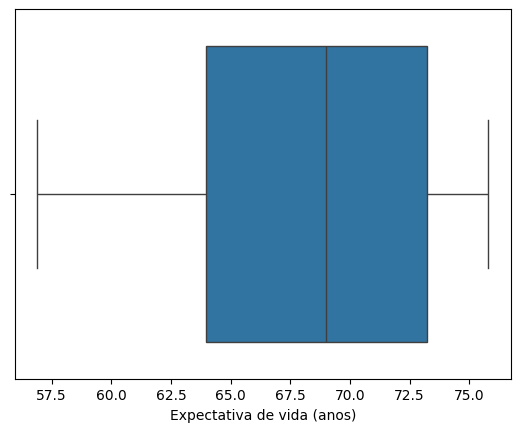

In [271]:
#| label: fig-box-plot
#| fig-cap: "Box plot da expectativa de vida no Brasil"

import seaborn as sns

fig = sns.boxplot(x=df_brazil_life_expectancy["Brazil Life Expectancy"])
fig.set_xlabel("Expectativa de vida (anos)");

#### Violin plot

O *violin plot* é uma junção do *box plot* com um gráfico chamado *kernel density plot* e é frequentemente utilizado para visualizar a distribuição de dados de uma amostra.

Na @fig-violin-plot é possível observar esse gráfico para os dados em que estamos trabalhando.

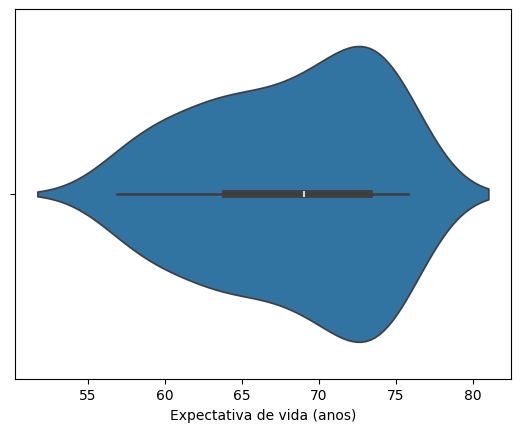

In [231]:
#| label: fig-violin-plot
#| fig-cap: "Violin plot da expectativa de vida no Brasil"

fig = sns.violinplot(x=df_brazil_life_expectancy["Brazil Life Expectancy"])
fig.set_xlabel("Expectativa de vida (anos)");

#### Histograma de ocorrências

Para calcular a quantidade de intervalos ($k$) para o histograma, podemos utilizar a fórmula de Sturges (@eq-sturges)

$$
k = \log_{2} \left ( n \right ) + 1
$$ {#eq-sturges}

em que $n$ é o tamanho da amostra. Logo, utilizando a biblioteca [NumPy](https://numpy.org/) para calcular o logaritmo, obtemos:

In [232]:
#| code-fold: false

import numpy as np

k = np.log2(len(df_brazil_life_expectancy)) + 1
k

6.643856189774724

Adotaremos então 7 intervalos para construirmos os histogramas dos dados.

Um histograma de ocorrências dos dados é apresentado na @fig-hist-ocorrencias.

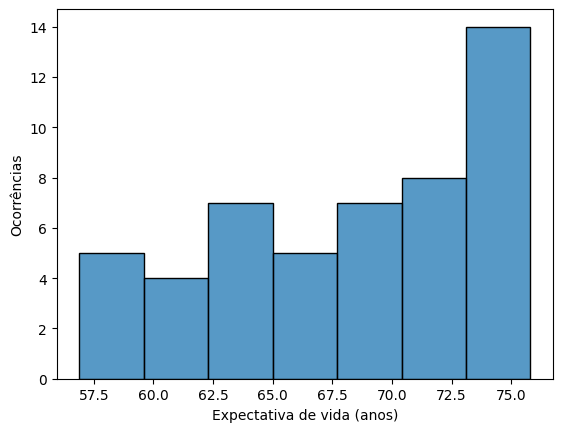

In [272]:
#| label: fig-hist-ocorrencias
#| fig-cap: "Histograma de ocorrências da expectativa de vida no Brasil"

N_BINS = 7

fig = sns.histplot(data=df_brazil_life_expectancy, x="Brazil Life Expectancy", bins=N_BINS)
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Ocorrências");

#### Histograma de frequências relativas

Um histograma de frequências relativas é apresentado na @fig-hist-frelativas.

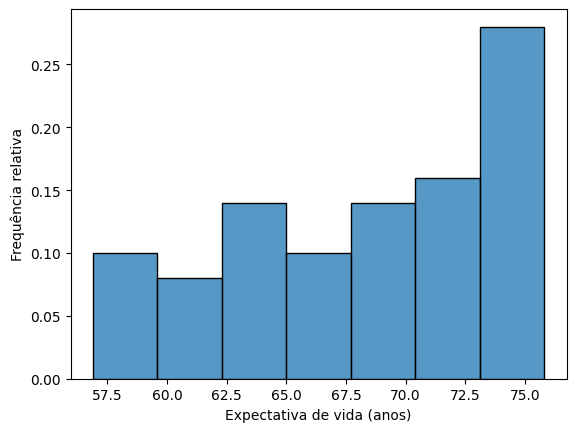

In [273]:
#| label: fig-hist-frelativas
#| fig-cap: "Histograma de frequências relativas da expectativa de vida no Brasil"

fig = sns.histplot(data=df_brazil_life_expectancy, x="Brazil Life Expectancy", bins=N_BINS, stat="probability")
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Frequência relativa");


#### Histograma de densidade de probabilidade

Um histograma de densidade de probabilidade é apresentado na @fig-hist-density-prob.

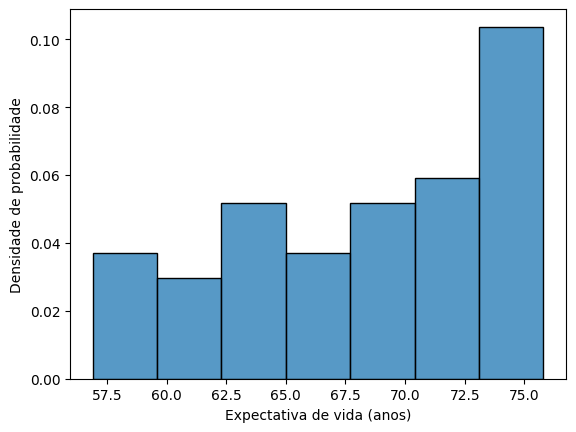

In [274]:
#| label: fig-hist-density-prob
#| fig-cap: "Histograma de densidade de probabilidade da expectativa de vida no Brasil"

fig = sns.histplot(data=df_brazil_life_expectancy, x="Brazil Life Expectancy", bins=N_BINS, stat="density")
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Densidade de probabilidade");

#### Histograma cumulativo das observações

Um histograma cumulativo das observações é apresentado na @fig-hist-cumulativo-obs.

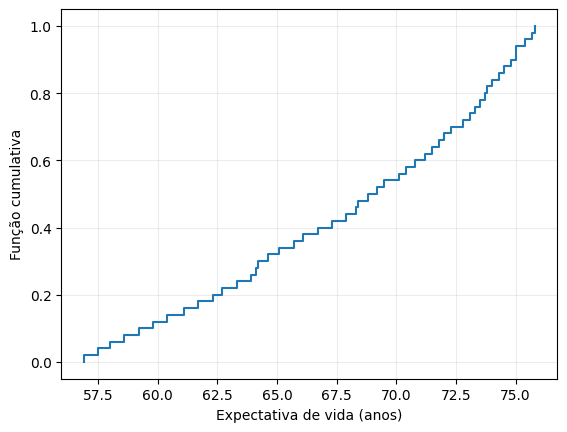

In [373]:
#| label: fig-hist-cumulativo-obs
#| fig-cap: "Histograma cumulativo das observações da expectativa de vida no Brasil"

fig = sns.ecdfplot(data=df_brazil_life_expectancy, x="Brazil Life Expectancy")
fig.set_ylim(-0.05, 1.05)
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Função cumulativa");
fig.grid(True, color="gray", alpha=0.15)


## Item b)

Para implementar o teste de Kolmogorov-Smirnov, precisaremos da função de distribuição acumulada empírica ($ECDF$) dos dados trabalhados.

Para obtê-la, iremos fazer uso da biblioteca [SciPy](https://scipy.org/), que possui um módulo com diversas funções estatísticas. No trecho de código abaixo, é feita a implementação para obter a função de distribuição acumulada empírica.

In [283]:
#| code-fold: false
import scipy.stats as ss

ECDF = ss.ecdf(df_brazil_life_expectancy["Brazil Life Expectancy"]).cdf

O teste de Kolmogorov-Smirnov calcula a máxima distância entre a função cumulativa de probabilidade do modelo hipotético ($F_{X}$) parametrizado e o histograma cumulativo da amostra dado pela ($ECDF$).

Esse teste é matematicamente expresso pela @eq-kstest.

$$
ks = \max \left \{ \left | ECDF_{i} - F_{X}(x_{i}) \right | \right \}
$$ {#eq-kstest}

No trecho de código abaixo são apresentadas funções que automatizam os cálculos para o teste de Kolmogorov-Smirnov e a geração de gráficos comparativos das funções de distribuição acumulada.

Para realizar a composição de gráficos, a biblioteca [Matplotlib](https://matplotlib.org/) foi utilizada.

In [367]:
# | code-fold: false

import matplotlib.pyplot as plt


def calculate_ks_test(data: pd.Series, ecdf, distribution, loc, scale):
    min_value = data.min()
    max_value = data.max()
    step = (max_value - min_value) / 1e5

    x_range = np.arange(min_value, max_value + step, step)

    ks_test_value = 0
    x_ks_test = min_value

    for xi in x_range:
        ks = abs(ecdf.evaluate(xi) - distribution.cdf(xi, loc=loc, scale=scale))
        if ks > ks_test_value:
            ks_test_value = ks
            x_ks_test = xi

    return ks_test_value, x_ks_test


def plot_ks_test(ecdf, distribution, loc, scale, x_ks_value, ks_test_value, save=False):
    fig, ax = plt.subplots()
    x_plot = np.linspace(
        distribution.ppf(0.001, loc=loc, scale=scale),
        distribution.ppf(0.999, loc=loc, scale=scale),
        1000,
    )
    ax.plot(
        x_plot, distribution.cdf(x_plot, loc=loc, scale=scale), label="CDF"
    )
    ecdf.plot(ax=ax, label="ECDF (Empírica)")
    ax.plot(
        [x_ks_value, x_ks_value],
        [
            distribution.cdf(x_ks_value, loc=loc, scale=scale),
            ecdf.evaluate(x_ks_value),
        ],
        "k+-",
    )
    ax.set_xlabel("Expectativa de vida (anos)")
    ax.set_ylabel("Função cumulativa")
    ax.legend(loc="best")
    ax.annotate(
        f"ks = {ks_test_value:.5f}",
        (x_ks_value, ecdf.evaluate(x_ks_value) + 0.05),
        xytext=(x_ks_value + 1, ecdf.evaluate(x_ks_value) + 0.05),
    )
    ax.grid(True, color="gray", alpha=0.15)
    if save:
        fig.savefig("ks-test.pdf", bbox_inches="tight")

### Modelo Gaussiano

Para o modelo Gaussiano, as estimativas de $E(X)$ e de $Var(X)$ são a média amostral ($\bar{x}$) e variância amostral ($s^{2}$). Os parâmetros `loc` e `scale` utilizados para essa distribuição são, portanto, a média amostral e desvio padrão amostral.

O trecho de código para efetuar os cálculos do teste de Kolmogorov-Smirnov é apresentado abaixo.

In [375]:
#| code-fold: false

ks_test_value_gauss, x_ks_test_gauss = calculate_ks_test(
    df_brazil_life_expectancy["Brazil Life Expectancy"], ECDF, ss.norm, mean, standard_deviation
)
ks_test_value_gauss, x_ks_test_gauss

(0.10636323684719218, 71.1999289999156)

Portanto, o valor do teste de Kolmogorov-Smirnov obtido pela implementação desenvolvida foi **0,10636** e foi encontrado para o valor de **71,2 anos**.

Na @fig-ks-gauss é apresentada uma representação gráfica do teste, com a indicação do valor obtido e posição no gráfico.

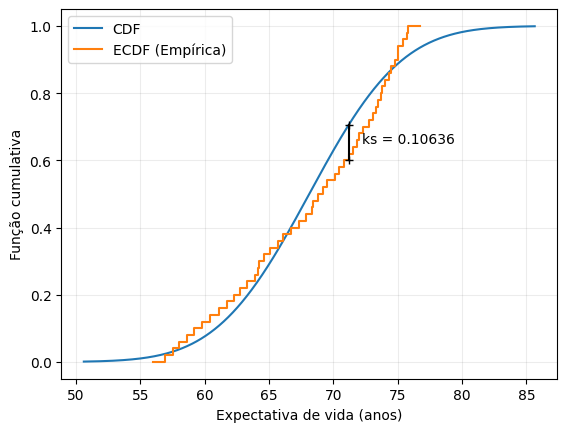

In [374]:
#| label: fig-ks-gauss
#| fig-cap: "Teste de Kolmogorov-Smirnov para a distribuição normal"

plot_ks_test(ECDF, ss.norm, mean, standard_deviation, x_ks_test_gauss, ks_test_value_gauss)

Para validar o resultado obtido, foi realizado no trecho de código abaixo o teste de Kolmogorov-Smirnov por meio da função `kstest` da biblioteca [SciPy](https://scipy.org/).

In [378]:
#| code-fold: false
ks_res_gauss = ss.kstest(df_brazil_life_expectancy["Brazil Life Expectancy"], "norm", args=(mean, standard_deviation))
ks_res_gauss

KstestResult(statistic=0.10636754772067303, pvalue=0.5863628686773552, statistic_location=71.2, statistic_sign=-1)

Na tabela abaixo é apresentado um resumo dos resultados.

In [381]:
df_ks_gauss = pd.DataFrame(
    [
        {"ks": ks_test_value_gauss, "Location": x_ks_test_gauss},
        {"ks": ks_res_gauss.statistic, "Location": ks_res_gauss.statistic_location},
    ]
)
df_ks_gauss.index = ["Manual", "Scipy"]
df_ks_gauss

,ks,Location
Manual,0.106363,71.199929
Scipy,0.106368,71.200000


Portanto, nota-se que o resultado obtido pela implementação apresentada foi muito próximo do resultado da função `kstest`.

In [372]:
ss.ksone.ppf(1-0.05/2,50)

0.18840676151343094

In [370]:
1.38/np.sqrt(50)

0.1951614716074871